# Predicting titanic disaster death probability using Machine Learning


In this project we will cover whether a person will die or will be alive at titanic disaster

## 1. Problem Definition
> It is your job to predict if a passenger survived the sinking of the Titanic or not.> 
For each in the test set, you must predict a 0 or 1 value for the variable.

## 2.Data 
> The data downloaded from the kaggle Titanic Tutorial competition

Overview
The data has been split into two groups
* training set (train.csv)
* test set (test.csv)

Also for submission there is a example file
* gender_submission.csvcsv)

## 3.Evaluation
> Your score is the percentage of passengers you correctly predict. This is known as accuracy.

**Project link:** https://www.kaggle.com/competitions/titanic/overview

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('datas/train.csv')

In [3]:
df_original.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
len(df_original)

891

In [5]:
df_original.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

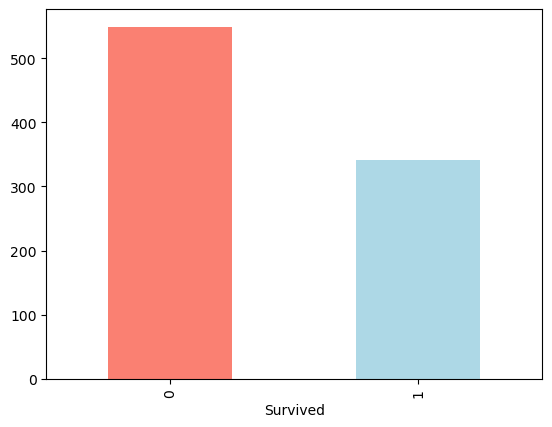

In [6]:
df_original.Survived.value_counts().plot(kind='bar', color=['salmon','lightblue']);

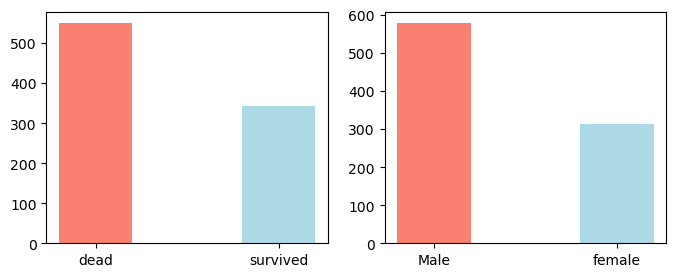

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(8,3))
ax1.bar(['dead', 'survived'] ,df_original.Survived.value_counts(), color=['salmon','lightblue'], width=0.4);
ax2.bar(['Male', 'female'], df_original.Sex.value_counts(), color=['salmon','lightblue'], width=0.4);


<BarContainer object of 2 artists>

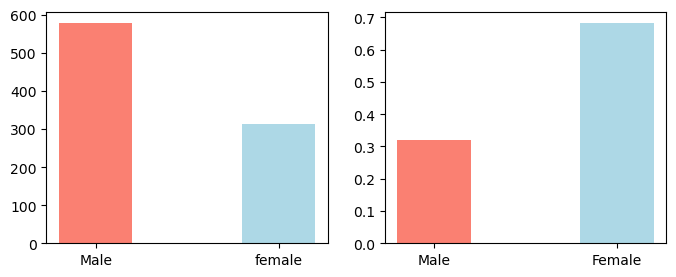

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(8,3))

male = df_original[df_original['Sex'] == 'male']
male_1 = male[male['Survived'] == 1]
male_1_len = len(male_1)

female = df_original[df_original['Sex'] == 'female']
female_1 = female[female['Survived'] == 1]
female_1_len = len(female_1)
total = male_1_len + female_1_len

ratio = {'lab': ['Male', 'Female'],
         'values': [male_1_len / total, female_1_len / total]}

ratio_df = pd.DataFrame(ratio)
ratio_df

ax1.bar(['Male', 'female'], df_original.Sex.value_counts(), color=['salmon','lightblue'], width=0.4);
ax2.bar(ratio['lab'], ratio['values'], color=['salmon','lightblue'], width=0.4)

#ratio_df.plot.bar(x='lab', y='values')

In [9]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Lets see whether Pclass effect or not

In [11]:
pd.crosstab(index=df_original.Pclass, columns=df_original.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Lets see that in plot

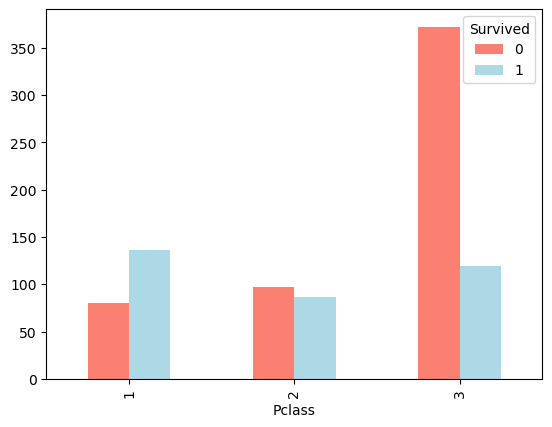

In [12]:
pd.crosstab(index=df_original.Pclass, columns=df_original.Survived).plot.bar(color=['salmon','lightblue']);

### lets split the fare column into 3 parts for make it plottable

In [13]:
group1 = df_original[df_original['Fare'] < 50]
group2 = df_original[50 < df_original['Fare']]
group2 = group2[df_original['Fare'] < 150]
group3 = df_original[150 < df_original['Fare']]

len(group1), len(group2), len(group3) 

C:\Users\Hp\AppData\Local\Temp\ipykernel_9028\4019752366.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = group2[df_original['Fare'] < 150]


(730, 131, 29)

In [14]:
dict = {'group1': [len(group1[group1.Survived == 0]), len(group1[group1.Survived == 1])],
        'group2': [len(group2[group2.Survived == 0]), len(group2[group2.Survived == 1])],
        'group3': [len(group3[group3.Survived == 0]), len(group3[group3.Survived == 1])],
       }

<Axes: >

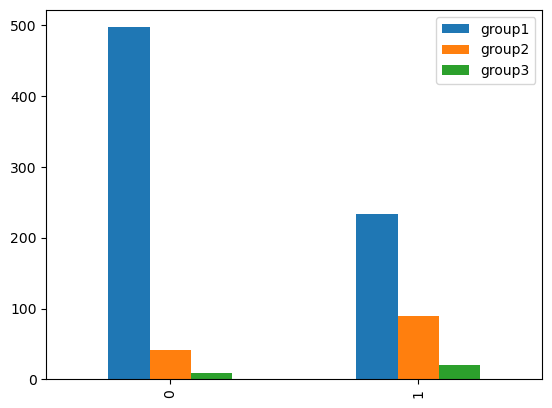

In [15]:
dict_df = pd.DataFrame(dict)
dict_df.plot.bar()

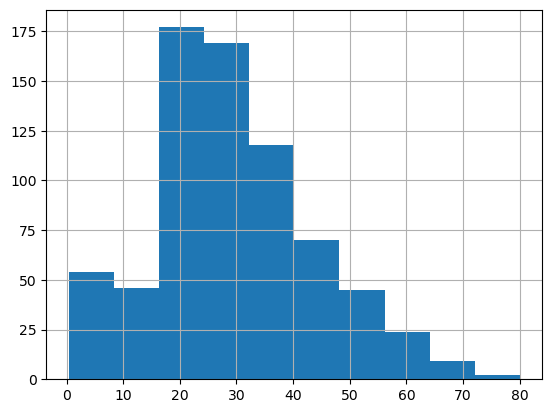

In [16]:
df_original.Age.hist();

In [17]:
# Just a demonstration of what we do for Name column

data = [
    "Cumings, Mrs. John Bradley (Florence Briggs Thayer)",
    "Heikkinen, Miss. Laina",
    "Futrelle, Mrs. Jacques Heath (Lily May Peel)",
    "Allen, Mr. William Henry",
    "Moran, Mr. James",
    "McCarthy, Mr. Timothy J",
    "Palsson, Master. Gosta Leonard",
    "Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
]


name1 = []
name2 = []
name3 = []

for entry in data:
    parts = entry.split(',')
    before_comma = parts[0].strip() 
    if '.' in parts[1]:
        middle_parts = parts[1].split('.', 1)
        middle_part = middle_parts[0].strip() + '.'
        after_dot = middle_parts[1].strip()
    else:
        middle_part = parts[1].strip()
        after_dot = ''

    name1.append(before_comma)
    name2.append(middle_part)
    name3.append(after_dot)

In [18]:
replika_df = df_original

In [19]:
name1 = []
name2 = []
name3 = []

for entry in replika_df.Name:
    parts = entry.split(',')
    before_comma = parts[0].strip() 
    if '.' in parts[1]:
        middle_parts = parts[1].split('.', 1)
        middle_part = middle_parts[0].strip() + '.'
        after_dot = middle_parts[1].strip()
    else:
        middle_part = parts[1].strip()
        after_dot = ''

    name1.append(before_comma)
    name2.append(middle_part)
    name3.append(after_dot)

In [20]:
replika_df.drop('Name', inplace=True, axis=1)

In [21]:
replika_df['Name1'] = name1
replika_df['Name2'] = name2
replika_df['Name3'] = name3

In [22]:
def categorize_title(title):
    if title in ['Mr.', 'Mrs.', 'Ms.', 'Miss.']:
        return 'Commoner'
    elif title in ['Master.', 'Don.', 'Lady.', 'Sir.', 'Jonkheer.', 'Dona.']:
        return 'Nobility'
    elif title in ['Rev.', 'Dr.', 'Major.', 'Col.', 'Capt.']:
        return 'Professional'
    elif title in ['Mme.', 'Mlle.']:
        return 'Royalty'
    else:
        return np.nan

replika_df['TitleGroup'] = replika_df['Name2'].apply(categorize_title)

In [23]:
replika_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Name1        891 non-null    object 
 12  Name2        891 non-null    object 
 13  Name3        891 non-null    object 
 14  TitleGroup   890 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [24]:
def split_cabin_number(cabines):
    cabin_list=[]
    for cabin in cabines:
        if pd.notna(cabin):
            cabin_name=list(cabin)
            cabin_list.append(cabin_name[0])
        else:
            cabin_list.append(cabin)
    return cabin_list
replika_df['cabin_class']=split_cabin_number(replika_df.Cabin)


In [25]:
replika_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name1,Name2,Name3,TitleGroup,cabin_class
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris,Commoner,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer),Commoner,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina,Commoner,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel),Commoner,C
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry,Commoner,NaN
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James,Commoner,NaN
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J,Commoner,E
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master.,Gosta Leonard,Nobility,NaN
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs.,Oscar W (Elisabeth Vilhelmina Berg),Commoner,NaN
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs.,Nicholas (Adele Achem),Commoner,NaN


In [26]:
# Use label encoder to transform TitleGroup
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Let's create another repl'ca df
replika_df2 = replika_df

In [27]:
replika_df['TitleGroup'] = le.fit_transform(replika_df['TitleGroup'])

In [28]:
pd.crosstab(index=replika_df.TitleGroup, columns=replika_df.Survived)

Survived,0,1
TitleGroup,,
0,517,308
1,19,25
2,13,5
3,0,3
4,0,1


In [29]:
# Let's get rid of unwanted columns
replika_df.drop('Name3', axis=1, inplace=True)
replika_df.drop('Name1', axis=1, inplace=True)
replika_df.drop('Cabin', axis=1, inplace=True)
replika_df.drop('Ticket', axis=1, inplace=True)


In [30]:
replika_df.head(190)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name2,TitleGroup,cabin_class
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.,0,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.,0,C
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.,0,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.,0,C
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,0,1,male,NaN,0,0,50.0000,S,Mr.,0,A
186,187,1,3,female,NaN,1,0,15.5000,Q,Mrs.,0,NaN
187,188,1,1,male,45.0,0,0,26.5500,S,Mr.,0,NaN
188,189,0,3,male,40.0,1,1,15.5000,Q,Mr.,0,NaN


In [31]:
replika_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Name2            0
TitleGroup       0
cabin_class    687
dtype: int64

In [32]:
# Here we add an column for make it seeneable when cabin class column is empty or not
replika_df['cabin_class_ismissing'] = pd.isnull(replika_df['cabin_class'])
replika_df['cabin_class'] = replika_df['cabin_class'].fillna('missing')


In [33]:
replika_df.cabin_class_ismissing.value_counts()

cabin_class_ismissing
True     687
False    204
Name: count, dtype: int64

In [34]:
replika_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Sex                    891 non-null    object 
 4   Age                    714 non-null    float64
 5   SibSp                  891 non-null    int64  
 6   Parch                  891 non-null    int64  
 7   Fare                   891 non-null    float64
 8   Embarked               889 non-null    object 
 9   Name2                  891 non-null    object 
 10  TitleGroup             891 non-null    int32  
 11  cabin_class            891 non-null    object 
 12  cabin_class_ismissing  891 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(5), object(4)
memory usage: 81.0+ KB


In [35]:
type(replika_df['Age'])

pandas.core.series.Series

In [36]:
# Let's convert to numeric value
replika_df['Age'] = pd.to_numeric(replika_df['Age'], errors='coerce')

In [37]:
replika_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name2,TitleGroup,cabin_class,cabin_class_ismissing
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.,0,missing,True
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.,0,C,False
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.,0,missing,True
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.,0,C,False
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.,0,missing,True


In [38]:
replika_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Sex                    891 non-null    object 
 4   Age                    714 non-null    float64
 5   SibSp                  891 non-null    int64  
 6   Parch                  891 non-null    int64  
 7   Fare                   891 non-null    float64
 8   Embarked               889 non-null    object 
 9   Name2                  891 non-null    object 
 10  TitleGroup             891 non-null    int32  
 11  cabin_class            891 non-null    object 
 12  cabin_class_ismissing  891 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(5), object(4)
memory usage: 81.0+ KB


In [39]:
mean = replika_df['Age'].mean()

In [40]:
mean

29.69911764705882

In [41]:
# Let's fill the Age column
replika_df['Age'] = replika_df['Age'].fillna(mean)

### Converting bool and object to category

In [42]:
for label in replika_df.keys():
    if replika_df[label].dtype == object or replika_df[label].dtype == bool:
        replika_df[label] = replika_df[label].astype('category').cat.as_ordered()    

In [43]:
replika_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    int64   
 3   Sex                    891 non-null    category
 4   Age                    891 non-null    float64 
 5   SibSp                  891 non-null    int64   
 6   Parch                  891 non-null    int64   
 7   Fare                   891 non-null    float64 
 8   Embarked               889 non-null    category
 9   Name2                  891 non-null    category
 10  TitleGroup             891 non-null    int32   
 11  cabin_class            891 non-null    category
 12  cabin_class_ismissing  891 non-null    category
dtypes: category(5), float64(2), int32(1), int64(5)
memory usage: 58.1 KB


### Converting categories to numerical value

In [44]:
for label in df_original.keys():
    if replika_df[label].dtype == 'category':
        replika_df[label] = replika_df[label].cat.codes

In [45]:
replika_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Sex                    891 non-null    int8   
 4   Age                    891 non-null    float64
 5   SibSp                  891 non-null    int64  
 6   Parch                  891 non-null    int64  
 7   Fare                   891 non-null    float64
 8   Embarked               891 non-null    int8   
 9   Name2                  891 non-null    int8   
 10  TitleGroup             891 non-null    int32  
 11  cabin_class            891 non-null    int8   
 12  cabin_class_ismissing  891 non-null    int8   
dtypes: float64(2), int32(1), int64(5), int8(5)
memory usage: 56.7 KB


## Modelling 

try to look which models best suits for this data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


models = {'LogisticRegression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'SVC': SVC(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'GaussianNB': GaussianNB()}

In [47]:
# Let's divide the our data into two parts for evaluation.
from sklearn.model_selection import train_test_split

X = replika_df.drop('Survived', axis=1)
y = replika_df.Survived

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))